In [9]:
import numpy as np
import tensorflow as tf
data = np.loadtxt("life_satisfaction.csv",
                  dtype=np.float32,
                  delimiter=",",
                  skiprows=1,
                  usecols=[1, 2])
X_train = data[:, 0:1] / 10000 # feature scaling
y_train = data[:, 1:2]

learning_rate = 0.01

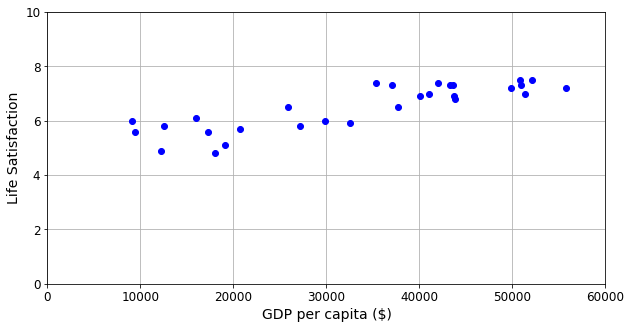

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def plot_life_satisfaction(X_train, y_train):
    plt.plot(X_train * 10000, y_train, "bo")
    plt.axis([0, 60000, 0, 10])
    plt.xlabel("GDP per capita ($)")
    plt.ylabel("Life Satisfaction")
    plt.grid()

plt.figure(figsize=(10,5))
plot_life_satisfaction(X_train, y_train)
plt.show()

In [11]:
def plot_life_satisfaction_with_linear_model(X_train, y_train, w, b):
    plot_life_satisfaction(X_train, y_train)
    plt.plot([0, 60000], [b, w[0][0] * (60000 / 10000) + b])

In [14]:
graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    gradients_w, gradients_b = tf.gradients(mse, [w, b])  # <= IT'S AUTODIFF MAGIC!

    tweak_w_op = tf.assign(w, w - learning_rate * gradients_w)
    tweak_b_op = tf.assign(b, b - learning_rate * gradients_b)
    training_op = tf.group(tweak_w_op, tweak_b_op)

    init = tf.global_variables_initializer()

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 1.8935
Iteration   200, MSE: 1.1304
Iteration   300, MSE: 0.7073
Iteration   400, MSE: 0.4727
Iteration   500, MSE: 0.3426
Iteration   600, MSE: 0.2705
Iteration   700, MSE: 0.2305
Iteration   800, MSE: 0.2083
Iteration   900, MSE: 0.1960
Iteration  1000, MSE: 0.1892
Iteration  1100, MSE: 0.1855
Iteration  1200, MSE: 0.1834
Iteration  1300, MSE: 0.1822
Iteration  1400, MSE: 0.1816
Iteration  1500, MSE: 0.1812
Iteration  1600, MSE: 0.1810
Iteration  1700, MSE: 0.1809
Iteration  1800, MSE: 0.1808
Iteration  1900, MSE: 0.1808


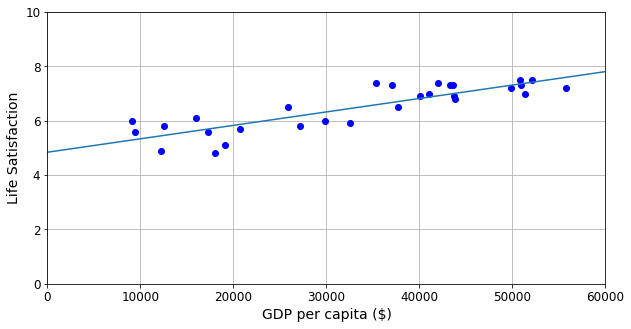

In [15]:
n_iterations = 2000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])
    
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()    

In [16]:
graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(mse)  # <= MOAR AUTODIFF MAGIC!

    init = tf.global_variables_initializer()

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 1.8935
Iteration   200, MSE: 1.1304
Iteration   300, MSE: 0.7073
Iteration   400, MSE: 0.4727
Iteration   500, MSE: 0.3426
Iteration   600, MSE: 0.2705
Iteration   700, MSE: 0.2305
Iteration   800, MSE: 0.2083
Iteration   900, MSE: 0.1960
Iteration  1000, MSE: 0.1892
Iteration  1100, MSE: 0.1855
Iteration  1200, MSE: 0.1834
Iteration  1300, MSE: 0.1822
Iteration  1400, MSE: 0.1816
Iteration  1500, MSE: 0.1812
Iteration  1600, MSE: 0.1810
Iteration  1700, MSE: 0.1809
Iteration  1800, MSE: 0.1808
Iteration  1900, MSE: 0.1808


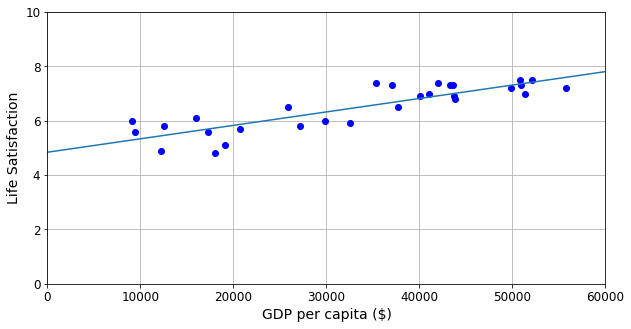

In [18]:
n_iterations = 2000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])
    
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()      

In [21]:
learning_rate = 0.01
momentum = 0.8

graph = tf.Graph()
with graph.as_default():
    X = tf.constant(X_train, dtype=tf.float32, name="X")
    y = tf.constant(y_train, dtype=tf.float32, name="y")

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse)

    init = tf.global_variables_initializer()

In [22]:
n_iterations = 500

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(iteration, mse.eval()))
        training_op.run()
    w_val, b_val = sess.run([w, b])

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 0.3305
Iteration   200, MSE: 0.1870
Iteration   300, MSE: 0.1810
Iteration   400, MSE: 0.1808


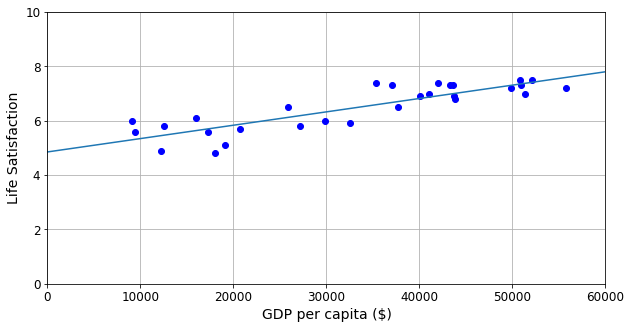

In [23]:
plt.figure(figsize=(10, 5))
plot_life_satisfaction_with_linear_model(X_train, y_train, w_val, b_val)
plt.show()

In [25]:
coll = graph.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
[var.op.name for var in coll]

['b', 'w']

Making Predictions Outside of TensorFlow

In [26]:
cyprus_gdp_per_capita = 22000
cyprus_life_satisfaction = w_val[0][0] * cyprus_gdp_per_capita / 10000 + b_val
cyprus_life_satisfaction

5.9328389406204227

Using placeholders

In [46]:
graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32, shape=[None, 1], name="X") # <= None allows for any
    y = tf.placeholder(tf.float32, shape=[None, 1], name="y") #    training batch size

    b = tf.Variable(0.0, name="b")
    w = tf.Variable(tf.zeros([1, 1]), name="w")
    y_pred = tf.add(tf.matmul(X, w), b, name="y_pred")  # X @ w + b
    
    mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")

    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
    training_op = optimizer.minimize(mse)

    init = tf.global_variables_initializer()
    #saver = tf.train.Saver() # <= At the very end of the construction phase
    
summary_writer = tf.summary.FileWriter("tf_logs2/run_number_1_solution/", graph=graph)    

In [47]:
n_iterations = 500

X_test = np.array([[22000]], dtype=np.float32) / 10000

with tf.Session(graph=graph) as sess:
    init.run()
    for iteration in range(n_iterations):
        feed_dict = {X: X_train, y: y_train}
        if iteration % 100 == 0:
            print("Iteration {:5}, MSE: {:.4f}".format(
                iteration, 
                mse.eval(feed_dict))) # <= FEED TRAINING DATA
        training_op.run(feed_dict)    # <= FEED TRAINING DATA
    #saver.save(sess, "tf_logs/my_life_satisfaction_model") 
    #file_writer = tf.summary.FileWriter('tf_logs/run_number_1_solution/', sess.graph)
    # make the prediction:
    y_pred_val = y_pred.eval(feed_dict={X: X_test}) # <= FEED TEST DATA

Iteration     0, MSE: 42.8410
Iteration   100, MSE: 0.3305
Iteration   200, MSE: 0.1870
Iteration   300, MSE: 0.1810
Iteration   400, MSE: 0.1808


In [48]:
y_pred_val

array([[ 5.93283892]], dtype=float32)

In [40]:
#with tf.Session(graph=graph) as sess:
#    saver.restore(sess, "tf_logs/my_life_satisfaction_model")
#    # make the prediction:
#    y_pred_val = y_pred.eval(feed_dict={X: X_test})

In [42]:
filenames = ["life_satisfaction.csv"]
n_epochs = 500
batch_size = 5

graph = tf.Graph()
with graph.as_default():
    with tf.name_scope("reader"):
        reader = tf.TextLineReader(skip_header_lines=1)

        filename_queue = tf.train.string_input_producer(filenames, num_epochs=n_epochs)
        record_id, record = reader.read(filename_queue)

        record_defaults = [[''], [0.0], [0.0]]
        country, gdp_per_capita, life_satisfaction = tf.decode_csv(record, record_defaults=record_defaults)

        X_batch, y_batch = tf.train.batch([gdp_per_capita, life_satisfaction], batch_size=batch_size)
        X_batch_reshaped = tf.reshape(X_batch, [-1, 1])
        y_batch_reshaped = tf.reshape(y_batch, [-1, 1])

    with tf.name_scope("linear_model"):
        X = tf.placeholder_with_default(X_batch_reshaped, shape=[None, 1], name="X")
        y = tf.placeholder_with_default(y_batch_reshaped, shape=[None, 1], name="y")

        b = tf.Variable(0.0, name="b")
        w = tf.Variable(tf.zeros([1, 1]), name="w")
        y_pred = tf.add(tf.matmul(X / 10000, w), b, name="y_pred")  # X @ w + b
    
    with tf.name_scope("train"):
        mse = tf.reduce_mean(tf.square(y_pred - y), name="mse")
        global_step = tf.Variable(0, trainable=False, name='global_step')
        optimizer = tf.train.MomentumOptimizer(learning_rate, momentum)
        training_op = optimizer.minimize(mse, global_step=global_step)
        
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    saver = tf.train.Saver()

In [44]:
summary_writer = tf.summary.FileWriter("tf_logs1/run_number_2_solution/", graph=graph)